### Import Libraries

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [40]:
projects_df = pd.read_csv("../data/project_info_with_type_label.csv", low_memory=False)


In [41]:
projects_df.columns

Index(['Unnamed: 0', 'project_id', 'project_name', 'voluntary_registry',
       'arb_wa_project', 'voluntary_status', 'scope', 'type', 'type_rule',
       'type_ml', 'confidence', 'reduction_removal', 'methodology_protocol',
       'methodology_version', 'region', 'country', 'state',
       'project_site_location', 'project_developer', 'project_owner',
       'offset_project_operator', 'authorized_project_designee', 'verifier',
       'estimated_annual_emission_reductions', 'arb_id', 'arb_project_type',
       'arb_project_status', 'wa_id', 'wa_project_type', 'poa_id',
       'project_listed', 'project_registered', 'sustainability_certification',
       'project_type_from_the_registry', 'registry_documents',
       'project_website', 'notes_from_registry', 'notes_from_bctp',
       'project_description', 'added_to_database_version'],
      dtype='object')

In [42]:
projects_df.shape

(9087, 40)

In [43]:
projects_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9087 entries, 0 to 9086
Data columns (total 40 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            9087 non-null   int64  
 1   project_id                            9087 non-null   object 
 2   project_name                          9086 non-null   object 
 3   voluntary_registry                    9087 non-null   object 
 4   arb_wa_project                        9087 non-null   object 
 5   voluntary_status                      8764 non-null   object 
 6   scope                                 0 non-null      float64
 7   type                                  9087 non-null   object 
 8   type_rule                             5040 non-null   object 
 9   type_ml                               0 non-null      float64
 10  confidence                            0 non-null      float64
 11  reduction_removal

## Explore Data

In [44]:
projects_df.head()

,Unnamed: 0,project_id,project_name,voluntary_registry,arb_wa_project,voluntary_status,scope,type,type_rule,type_ml,confidence,reduction_removal,methodology_protocol,methodology_version,region,country,state,project_site_location,project_developer,project_owner,offset_project_operator,authorized_project_designee,verifier,estimated_annual_emission_reductions,arb_id,arb_project_type,arb_project_status,wa_id,wa_project_type,poa_id,project_listed,project_registered,sustainability_certification,project_type_from_the_registry,registry_documents,project_website,notes_from_registry,notes_from_bctp,project_description,added_to_database_version
0,0,ACR101,AFOVERT Energy,ACR,No,Canceled,NaN,Bundled Energy Efficiency,NaN,NaN,NaN,NaN,AMS-I.E. Switch from non-renewable biomass for...,NaN,Sub-Saharan Africa,Mali,Niono District,Niono,Katene Kadji,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not ARB or Ecology Eligible,NaN,NaN,NaN,NaN,NaN,06: Clean Water and Sanitation;07: Affordable ...,Fuel Switching,https://acr2.apx.com/mymodule/reg/prjView.asp?...,NaN,NaN,NaN,NaN,v 1 12-2020
1,1,ACR102,Air Bag Gas Substitution,ACR,No,Completed,NaN,SF6 Replacement,SF6 Replacement,NaN,NaN,NaN,Emission reductions through industrial gas sub...,NaN,North America,United States,OREGON,Beaverton,Nike,NaN,NaN,NaN,ERT,NaN,NaN,NaN,Not ARB or Ecology Eligible,NaN,NaN,NaN,NaN,NaN,NaN,Industrial Gas Substitution,https://acr2.apx.com/mymodule/reg/prjView.asp?...,NaN,NaN,NaN,NaN,v 1 12-2020
2,2,ACR103,Inland Empire Anaerobic Ag Digester,ACR,No,Completed,NaN,Manure Methane Digester,NaN,NaN,NaN,NaN,"Monitoring, Reporting, and Verification Protoc...",NaN,North America,United States,CALIFORNIA,Chino,Inland Empire Utilities Agency,NaN,NaN,NaN,"TÜV SÜD America, Inc. – Ruby Canyon",NaN,NaN,NaN,Not ARB or Ecology Eligible,NaN,NaN,NaN,NaN,NaN,NaN,Livestock Waste Management,https://acr2.apx.com/mymodule/reg/prjView.asp?...,NaN,NaN,NaN,NaN,v 1 12-2020
3,3,ACR104,Ankotrofotsy Community-based Reforestation and...,ACR,No,Inactive,NaN,Afforestation/Reforestation,Afforestation/Reforestation,NaN,NaN,NaN,AR-ACM0001 Afforestation and reforestation of ...,NaN,Sub-Saharan Africa,Madagascar,Miandrivazo,Ankotrofotsy,Tany Meva Foundation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not ARB or Ecology Eligible,NaN,NaN,NaN,NaN,NaN,06: Clean Water and Sanitation;13: Climate Act...,Forest Carbon,https://acr2.apx.com/mymodule/reg/prjView.asp?...,NaN,NaN,NaN,NaN,v 1 12-2020
4,4,ACR105,Boa Vista A/R,ACR,No,Canceled,NaN,Afforestation/Reforestation,Afforestation/Reforestation,NaN,NaN,NaN,AR-ACM0001 Afforestation and reforestation of ...,NaN,Latin America and the Caribbean,Brazil,Roraima,Boa Vista,F.I.T Timber Ltd,NaN,NaN,NaN,SCS Global Services (Scientific Certification ...,NaN,NaN,NaN,Not ARB or Ecology Eligible,NaN,NaN,NaN,NaN,NaN,06: Clean Water and Sanitation;13: Climate Act...,Forest Carbon,https://acr2.apx.com/mymodule/reg/prjView.asp?...,NaN,NaN,NaN,NaN,v 1 12-2020


## Data Cleanup and Preprocessing

In [45]:
# Cleaning up the Feature names to remove newline char, trim spaces, add lowercase and and replace "/" and " " by "or" and "_"
cleaned_column_names = projects_df.columns.str.strip().str.lower().str.replace('\n', '').str.replace('/', 'or').str.replace(' ', '_').str.replace('__', '_')

In [46]:
# Apply the cleaned column names to the DataFrame
projects_df.columns = cleaned_column_names

In [47]:
null_counts = projects_df.isnull().sum()
null_counts

unnamed:_0                                 0
project_id                                 0
project_name                               1
voluntary_registry                         0
arb_wa_project                             0
voluntary_status                         323
scope                                   9087
type                                       0
type_rule                               4047
type_ml                                 9087
confidence                              9087
reduction_removal                       9087
methodology_protocol                     101
methodology_version                     7865
region                                    10
country                                   10
state                                   7446
project_site_location                   7445
project_developer                          1
project_owner                           8183
offset_project_operator                 8374
authorized_project_designee             8953
verifier  

In [48]:
print(projects_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9087 entries, 0 to 9086
Data columns (total 40 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   unnamed:_0                            9087 non-null   int64  
 1   project_id                            9087 non-null   object 
 2   project_name                          9086 non-null   object 
 3   voluntary_registry                    9087 non-null   object 
 4   arb_wa_project                        9087 non-null   object 
 5   voluntary_status                      8764 non-null   object 
 6   scope                                 0 non-null      float64
 7   type                                  9087 non-null   object 
 8   type_rule                             5040 non-null   object 
 9   type_ml                               0 non-null      float64
 10  confidence                            0 non-null      float64
 11  reduction_removal

In [49]:
#Remove the project with Null name
project=projects_df[(projects_df["project_name"].isna()) | (projects_df["type"].isna())]
project

,unnamed:_0,project_id,project_name,voluntary_registry,arb_wa_project,voluntary_status,scope,type,type_rule,type_ml,confidence,reduction_removal,methodology_protocol,methodology_version,region,country,state,project_site_location,project_developer,project_owner,offset_project_operator,authorized_project_designee,verifier,estimated_annual_emission_reductions,arb_id,arb_project_type,arb_project_status,wa_id,wa_project_type,poa_id,project_listed,project_registered,sustainability_certification,project_type_from_the_registry,registry_documents,project_website,notes_from_registry,notes_from_bctp,project_description,added_to_database_version
6918,6919,VCS2240,NaN,VCS,No,Withdrawn,NaN,RE Bundled,NaN,NaN,NaN,NaN,ACM0002 Grid-connected electricity generation ...,NaN,North America,United States,NaN,NaN,Southern Power Company,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Energy industries (renewable/non-renewable sou...,https://registry.verra.org/app/projectDetail/V...,NaN,NaN,NaN,NaN,v 1 12-2020


In [50]:
## Drop the projects with null types
final_projects = projects_df.dropna(subset=["type"])

In [51]:
Inactive_projects = final_projects[final_projects["voluntary_status"]== "Inactive"]
print(Inactive_projects.shape)
Inactive_projects.head()

(194, 40)


,unnamed:_0,project_id,project_name,voluntary_registry,arb_wa_project,voluntary_status,scope,type,type_rule,type_ml,confidence,reduction_removal,methodology_protocol,methodology_version,region,country,state,project_site_location,project_developer,project_owner,offset_project_operator,authorized_project_designee,verifier,estimated_annual_emission_reductions,arb_id,arb_project_type,arb_project_status,wa_id,wa_project_type,poa_id,project_listed,project_registered,sustainability_certification,project_type_from_the_registry,registry_documents,project_website,notes_from_registry,notes_from_bctp,project_description,added_to_database_version
3,3,ACR104,Ankotrofotsy Community-based Reforestation and...,ACR,No,Inactive,NaN,Afforestation/Reforestation,Afforestation/Reforestation,NaN,NaN,NaN,AR-ACM0001 Afforestation and reforestation of ...,NaN,Sub-Saharan Africa,Madagascar,Miandrivazo,Ankotrofotsy,Tany Meva Foundation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not ARB or Ecology Eligible,NaN,NaN,NaN,NaN,NaN,06: Clean Water and Sanitation;13: Climate Act...,Forest Carbon,https://acr2.apx.com/mymodule/reg/prjView.asp?...,NaN,NaN,NaN,NaN,v 1 12-2020
15,15,ACR116,Societe VERAMA Madagascar Afforestation Project,ACR,No,Inactive,NaN,Afforestation/Reforestation,Afforestation/Reforestation,NaN,NaN,NaN,AR-ACM0001 Afforestation and reforestation of ...,NaN,Sub-Saharan Africa,Madagascar,Antonibe,Masiloka Peninsula,Societe VERAMA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not ARB or Ecology Eligible,NaN,NaN,NaN,NaN,NaN,06: Clean Water and Sanitation;13: Climate Act...,Forest Carbon,https://acr2.apx.com/mymodule/reg/prjView.asp?...,NaN,NaN,NaN,NaN,v 1 12-2020
81,81,ACR186,Devil Fire Reforestation,ACR,No,Inactive,NaN,Afforestation/Reforestation,NaN,NaN,NaN,NaN,CAR U.S. Forest Protocol,NaN,North America,United States,CALIFORNIA,Susanville,"W. M. Beaty & Associates, Inc.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not ARB or Ecology Eligible,NaN,NaN,NaN,NaN,NaN,06: Clean Water and Sanitation;13: Climate Act...,Forest Carbon,https://acr2.apx.com/mymodule/reg/prjView.asp?...,www.wmbeaty.com,NaN,NaN,NaN,v 1 12-2020
82,82,ACR187,Storrie Fire Reforestation,ACR,No,Inactive,NaN,Afforestation/Reforestation,NaN,NaN,NaN,NaN,CAR U.S. Forest Protocol,NaN,North America,United States,CALIFORNIA,Chester,"W. M. Beaty & Associates, Inc.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not ARB or Ecology Eligible,NaN,NaN,NaN,NaN,NaN,06: Clean Water and Sanitation;13: Climate Act...,Forest Carbon,https://acr2.apx.com/mymodule/reg/prjView.asp?...,www.wmbeaty.com,NaN,NaN,NaN,v 1 12-2020
6265,6265,VCS1329,Maísa REDD+ Project,VCS,No,Inactive,NaN,REDD+,NaN,NaN,NaN,NaN,VM0015 Methodology for Avoided Unplanned Defor...,NaN,Latin America and the Caribbean,Brazil,NaN,NaN,Multiple Proponents,NaN,NaN,NaN,NaN,67458.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Agriculture Forestry and Other Land Use,https://registry.verra.org/app/projectDetail/V...,NaN,NaN,NaN,NaN,v 1 12-2020


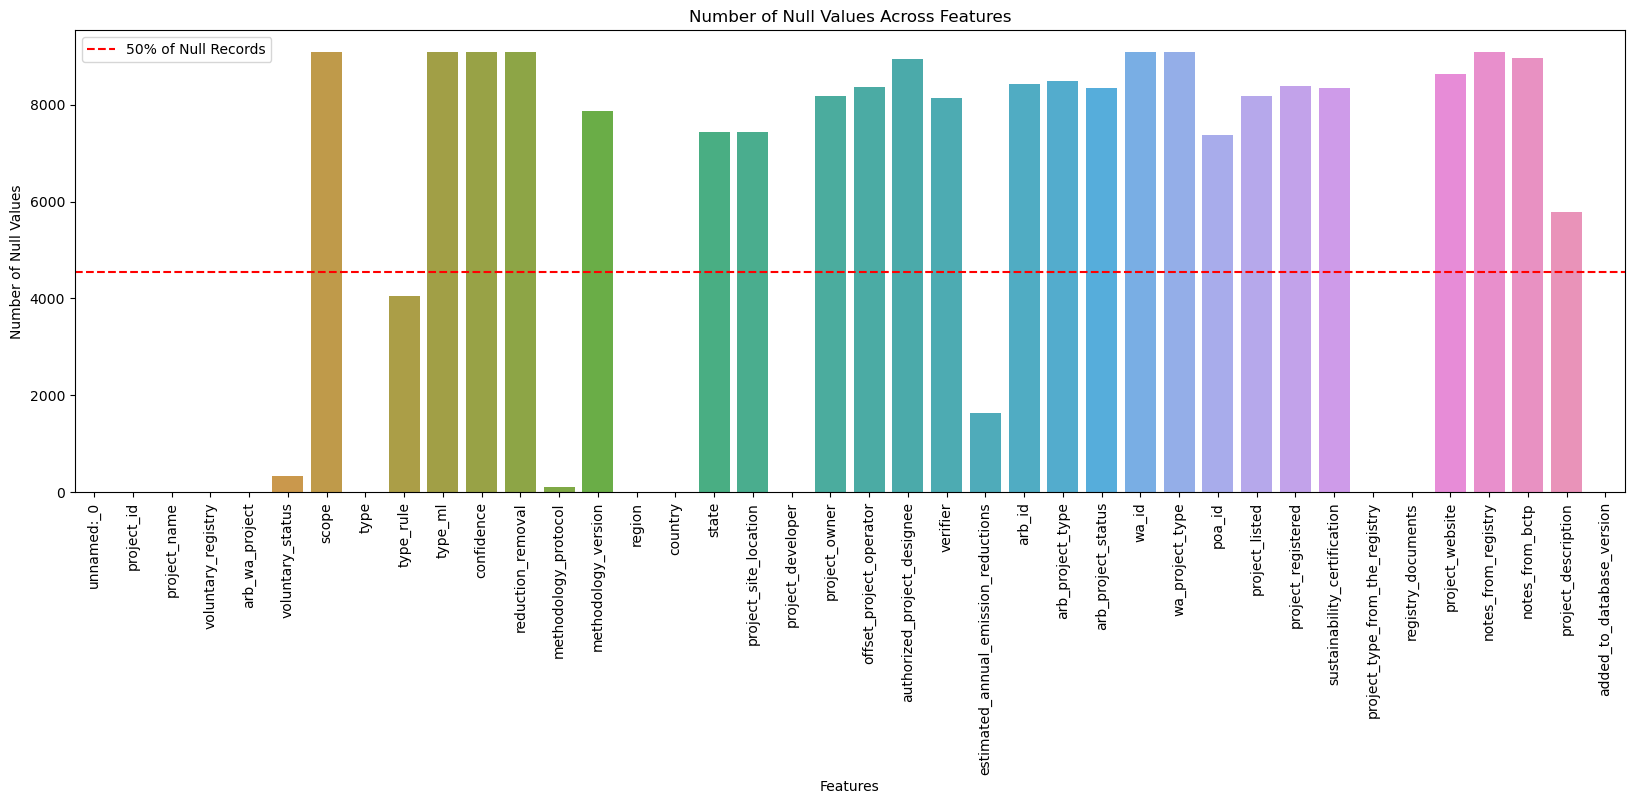

In [52]:
# Assuming 'final_projects' is your DataFrame
total_records = len(final_projects)
threshold = 0.5 * total_records

# Calculate the number of null values for each column
null_counts = final_projects.isnull().sum()

# Plot the number of null values using a bar plot
plt.figure(figsize=(20, 6))
sns.barplot(x=null_counts.index, y=null_counts.values)

# Add a horizontal line for 50% of null records
plt.axhline(y=threshold, color='r', linestyle='--', label='50% of Null Records')

plt.xlabel('Features')
plt.ylabel('Number of Null Values')
plt.title('Number of Null Values Across Features')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [53]:
#Drop all the columns with more than 50% null records
# Calculate the threshold for 50% null values
threshold = 0.5 * len(final_projects)

# Drop columns with more than 50% null values
columns_to_drop = final_projects.columns[final_projects.isnull().sum() > threshold]
print("Number of columns to be dropped:",len(columns_to_drop))
columns_to_drop


Number of columns to be dropped: 24


Index(['scope', 'type_ml', 'confidence', 'reduction_removal',
       'methodology_version', 'state', 'project_site_location',
       'project_owner', 'offset_project_operator',
       'authorized_project_designee', 'verifier', 'arb_id', 'arb_project_type',
       'arb_project_status', 'wa_id', 'wa_project_type', 'poa_id',
       'project_listed', 'project_registered', 'sustainability_certification',
       'project_website', 'notes_from_registry', 'notes_from_bctp',
       'project_description'],
      dtype='object')

In [54]:
projects_cleaned = final_projects.drop(columns=columns_to_drop)

In [55]:
# Generate the value counts for the 'Scope' column
type_counts = projects_cleaned['type'].value_counts()
type_counts

type
Cookstoves                                           1434
Wind                                                 1014
Improved Forest Management                            756
Hydropower                                            529
Afforestation/Reforestation                           475
Manure Methane Digester                               450
Clean Water                                           412
Landfill Methane                                      382
Solar - Centralized                                   327
Rice Emission Reductions                              292
Ozone Depleting Substances Recovery & Destruction     291
Biomass                                               277
REDD+                                                 272
Community Boreholes                                   259
Biodigesters                                          243
Sustainable Agriculture                               164
Bundled Energy Efficiency                             156
Mine Meth

In [56]:
project_by_regions = projects_cleaned.groupby(['region']).size().reset_index(name='Count')
project_by_regions

,region,Count
0,Central Asia,12
1,Eastern Asia,1470
2,Eastern Europe,25
3,Europe,122
4,International,10
5,Latin America and the Caribbean,1034
6,North America,1558
7,Northern Africa,34
8,Oceania,39
9,South-Eastern Asia,431


In [57]:
# Rename columns "type" to "project_type" and "methodology_protocol" to "methodology"
column_rename_dict = {
    'type': 'project_type',
    'methodology_protocol': 'methodology'
}

# Rename the columns in the DataFrame
projects_cleaned = projects_cleaned.rename(columns=column_rename_dict)
projects_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9087 entries, 0 to 9086
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   unnamed:_0                            9087 non-null   int64  
 1   project_id                            9087 non-null   object 
 2   project_name                          9086 non-null   object 
 3   voluntary_registry                    9087 non-null   object 
 4   arb_wa_project                        9087 non-null   object 
 5   voluntary_status                      8764 non-null   object 
 6   project_type                          9087 non-null   object 
 7   type_rule                             5040 non-null   object 
 8   methodology                           8986 non-null   object 
 9   region                                9077 non-null   object 
 10  country                               9077 non-null   object 
 11  project_developer

In [58]:
# Calculate value counts for 'type' column
type_counts = projects_cleaned['project_type'].value_counts()

types_to_group = type_counts[type_counts < 6].index

# Filter the DataFrame
other_type = projects_cleaned[projects_cleaned['project_type'].isin(types_to_group)]
print("Total Types :",len(types_to_group))
print("Shape of other_type dataframe:", other_type.shape)

Total Types : 21
Shape of other_type dataframe: (47, 16)


In [59]:
other_type.to_csv('../data/fewerthan6projects.csv', index=False)

In [60]:
# Remove the project types with less than 7 records from the dataset
final_projects_cleaned = projects_cleaned[~projects_cleaned['project_type'].isin(types_to_group)]
final_projects_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9040 entries, 0 to 9086
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   unnamed:_0                            9040 non-null   int64  
 1   project_id                            9040 non-null   object 
 2   project_name                          9039 non-null   object 
 3   voluntary_registry                    9040 non-null   object 
 4   arb_wa_project                        9040 non-null   object 
 5   voluntary_status                      8717 non-null   object 
 6   project_type                          9040 non-null   object 
 7   type_rule                             5010 non-null   object 
 8   methodology                           8939 non-null   object 
 9   region                                9030 non-null   object 
 10  country                               9030 non-null   object 
 11  project_developer     

In [61]:
##Check if any duplicates in the records

duplicate_rows = final_projects_cleaned[final_projects_cleaned.duplicated()]
# Print the duplicate rows
print("Duplicate rows:")
print(duplicate_rows)

Duplicate rows:
Empty DataFrame
Columns: [unnamed:_0, project_id, project_name, voluntary_registry, arb_wa_project, voluntary_status, project_type, type_rule, methodology, region, country, project_developer, estimated_annual_emission_reductions, project_type_from_the_registry, registry_documents, added_to_database_version]
Index: []


In [62]:
# Keeping only the features of interest
features_of_interest = ["project_id","project_name",
                        "methodology", 
                        "region", "voluntary_registry", "project_type_from_the_registry",
                        "project_developer", "arb_wa_project", "project_type"]


In [63]:
project_df_wfoi = final_projects_cleaned[features_of_interest]
project_df_wfoi.head()

,project_id,project_name,methodology,region,voluntary_registry,project_type_from_the_registry,project_developer,arb_wa_project,project_type
0,ACR101,AFOVERT Energy,AMS-I.E. Switch from non-renewable biomass for...,Sub-Saharan Africa,ACR,Fuel Switching,Katene Kadji,No,Bundled Energy Efficiency
2,ACR103,Inland Empire Anaerobic Ag Digester,"Monitoring, Reporting, and Verification Protoc...",North America,ACR,Livestock Waste Management,Inland Empire Utilities Agency,No,Manure Methane Digester
3,ACR104,Ankotrofotsy Community-based Reforestation and...,AR-ACM0001 Afforestation and reforestation of ...,Sub-Saharan Africa,ACR,Forest Carbon,Tany Meva Foundation,No,Afforestation/Reforestation
4,ACR105,Boa Vista A/R,AR-ACM0001 Afforestation and reforestation of ...,Latin America and the Caribbean,ACR,Forest Carbon,F.I.T Timber Ltd,No,Afforestation/Reforestation
5,ACR106,Brickyard LFG to Energy,"Monitoring, Reporting and Verification Protoco...",North America,ACR,Landfill Gas Capture & Combustion,Biogas Energy Solutions,No,Landfill Methane


In [64]:
project_df_wfoi.shape

(9040, 9)

In [65]:
#Final check for nulls across dataset
null_counts = project_df_wfoi.isnull().sum()
null_counts

project_id                          0
project_name                        1
methodology                       101
region                             10
voluntary_registry                  0
project_type_from_the_registry      0
project_developer                   0
arb_wa_project                      0
project_type                        0
dtype: int64

In [66]:
# Columns to fill with ''
object_columns = project_df_wfoi.select_dtypes(include='object').columns
fill_value_object = {col: ' ' for col in object_columns}

# Fill NaNs
project_df_wfoi = project_df_wfoi.fillna(fill_value_object)
final_count = project_df_wfoi.isnull().sum()
final_count

project_id                        0
project_name                      0
methodology                       0
region                            0
voluntary_registry                0
project_type_from_the_registry    0
project_developer                 0
arb_wa_project                    0
project_type                      0
dtype: int64

In [67]:
unique_counts = project_df_wfoi.apply(lambda x: x.nunique())
print("\nUnique Value Counts:")
print(unique_counts)


Unique Value Counts:
project_id                        9040
project_name                      8947
methodology                        304
region                              14
voluntary_registry                   4
project_type_from_the_registry     102
project_developer                 2975
arb_wa_project                       4
project_type                        59
dtype: int64


## Data Split

In [68]:
# Getting the project ids from the previous train and test sets from previos split to avoid data leakage
trainset_df = pd.read_csv("../data/train_dataset_w59types.csv", low_memory=False)
train_ids = trainset_df["project_id"]
print(len(train_ids))
train_df = project_df_wfoi[project_df_wfoi['project_id'].isin(train_ids)]
train_df.info()


7234
<class 'pandas.core.frame.DataFrame'>
Index: 7231 entries, 0 to 9086
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   project_id                      7231 non-null   object
 1   project_name                    7231 non-null   object
 2   methodology                     7231 non-null   object
 3   region                          7231 non-null   object
 4   voluntary_registry              7231 non-null   object
 5   project_type_from_the_registry  7231 non-null   object
 6   project_developer               7231 non-null   object
 7   arb_wa_project                  7231 non-null   object
 8   project_type                    7231 non-null   object
dtypes: object(9)
memory usage: 564.9+ KB


In [69]:
train_df.head()

,project_id,project_name,methodology,region,voluntary_registry,project_type_from_the_registry,project_developer,arb_wa_project,project_type
0,ACR101,AFOVERT Energy,AMS-I.E. Switch from non-renewable biomass for...,Sub-Saharan Africa,ACR,Fuel Switching,Katene Kadji,No,Bundled Energy Efficiency
2,ACR103,Inland Empire Anaerobic Ag Digester,"Monitoring, Reporting, and Verification Protoc...",North America,ACR,Livestock Waste Management,Inland Empire Utilities Agency,No,Manure Methane Digester
4,ACR105,Boa Vista A/R,AR-ACM0001 Afforestation and reforestation of ...,Latin America and the Caribbean,ACR,Forest Carbon,F.I.T Timber Ltd,No,Afforestation/Reforestation
5,ACR106,Brickyard LFG to Energy,"Monitoring, Reporting and Verification Protoco...",North America,ACR,Landfill Gas Capture & Combustion,Biogas Energy Solutions,No,Landfill Methane
6,ACR107,Camargo Fuel Substitution,ACM0011 Fuel switching from coal and/or petrol...,Latin America and the Caribbean,ACR,Fuel Switching,E+Co,No,Fuel Switching


In [70]:
test_df = project_df_wfoi[~project_df_wfoi['project_id'].isin(train_ids)]

In [71]:
#print shape of the split dataset
print(train_df.shape, test_df.shape)

(7231, 9) (1809, 9)


In [72]:
# Checkpoint 
# Save the DataFrames as CSV files
train_df.to_csv('../data/final_train_dataset_w59types.csv', index=False)
test_df.to_csv('../data/final_test_dataset_w59types.csv', index=False)

In [73]:
type_counts_train = train_df["project_type"].value_counts()
print(type_counts_train)
print("Total number of types",len(type_counts_train))

project_type
Cookstoves                                           1147
Wind                                                  811
Improved Forest Management                            605
Hydropower                                            423
Afforestation/Reforestation                           380
Manure Methane Digester                               360
Clean Water                                           330
Landfill Methane                                      306
Solar - Centralized                                   263
Rice Emission Reductions                              234
Ozone Depleting Substances Recovery & Destruction     233
Biomass                                               221
REDD+                                                 217
Community Boreholes                                   207
Biodigesters                                          194
Sustainable Agriculture                               131
Bundled Energy Efficiency                             125
M

In [74]:
type_counts_test = test_df["project_type"].value_counts()
print(type_counts_test)
print("Total number of types", len(type_counts_test))

project_type
Cookstoves                                           287
Wind                                                 203
Improved Forest Management                           151
Hydropower                                           106
Afforestation/Reforestation                           95
Manure Methane Digester                               90
Clean Water                                           82
Landfill Methane                                      76
Solar - Centralized                                   64
Ozone Depleting Substances Recovery & Destruction     58
Rice Emission Reductions                              58
Biomass                                               56
REDD+                                                 55
Community Boreholes                                   52
Biodigesters                                          49
Sustainable Agriculture                               33
Bundled Energy Efficiency                             31
Mine Methane Captu